# Proyek Analisis Data: [AIR QUALITY DATASET]
- **Nama:** STEVEN NATHAN SATHIA
- **Email:** M232D4KY1950@bangkit.academy
- **ID Dicoding:** stevennathan

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Apa tingkat polutan udara yang paling umum di Shunyi?
- Pertanyaan 2: Bagaimana kondisi udara selama waktu periode bulanan dan tahunan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv")
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


### Assessing Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [4]:
df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64

In [5]:
print("Banyak duplikasi pada data: ", df.duplicated().sum())

Banyak duplikasi pada data:  0


In [6]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34151.000000,34516.000000,33768.000000,33699.000000,32886.000000,33575.000000,35013.000000,35013.000000,35010.000000,35013.000000,35020.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.491602,98.737026,13.572039,43.908865,1187.063979,55.201321,13.387969,1013.061938,2.465036,0.061094,1.807533
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.231739,89.143718,19.572068,30.996828,1156.374102,54.873726,11.483588,10.177339,13.726622,0.761668,1.287817
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,19.000000,31.000000,2.000000,19.000000,400.000000,10.000000,3.000000,1004.700000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,77.000000,5.000000,37.000000,800.000000,43.000000,14.400000,1012.700000,3.100000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,138.000000,17.000000,62.000000,1500.000000,77.000000,23.200000,1021.000000,15.100000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,941.000000,999.000000,239.000000,258.000000,10000.000000,351.716400,40.600000,1042.800000,27.500000,37.300000,12.800000


In [7]:
print(df.dtypes)

No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object


### Cleaning Data

In [8]:
df.fillna(method = "ffill", inplace=True)

In [9]:
df.isna().sum().values.sum()

0

## Exploratory Data Analysis (EDA)

### Explore ...

Jenis Polusi udara tertinggi

In [10]:
#Mencari rata-rata setiap jenis polusi udara selama 5 tahun terakhir
air_polution = df.groupby(by = ['year'] ).agg({
            "PM2.5" : "mean",
            "PM10" : "mean",
            "SO2" : "mean",
            "NO2" : "mean",
            "CO" : "mean",
            "O3" : "mean"})
air_polution = air_polution.reset_index()
air_polution = air_polution.drop('year', axis=1)
air_polution = air_polution.mean()

In [11]:
#Mencari jenis polusi udara yang memiliki rata-rata tertinggi
highest_air_pollution = air_polution.idxmax()

print("Jenis polusi udara yang mencemari paling tinggi :", highest_air_pollution)

Jenis polusi udara yang mencemari paling tinggi : CO


Rata-rata suhu dan dew point tiap tahun

In [12]:
temp_dewp = df.groupby(by = ['year'] ).agg({
            "TEMP" : "mean",
            "DEWP" : "mean"})
temp_dewp.head(5)

,TEMP,DEWP
year,,
2013,15.535103,5.552029
2014,13.838950,2.437797
2015,13.250194,2.676655
2016,13.391381,2.178871
2017,-0.013388,-13.267726


Korelasi suhu udara dan dew point

In [13]:
dewpoint_suhu = df[['TEMP', 'DEWP']].copy()

korelasi_dewpoint_suhu = dewpoint_suhu.corr(method = "pearson")
korelasi_dewpoint_suhu

,TEMP,DEWP
TEMP,1.000000,0.824008
DEWP,0.824008,1.000000


In [14]:
korelasi = round(df['DEWP'].corr(df['TEMP'], method ="pearson"),3)
korelasi

0.824

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa tingkat polutan udara yang paling umum di Shunyi?

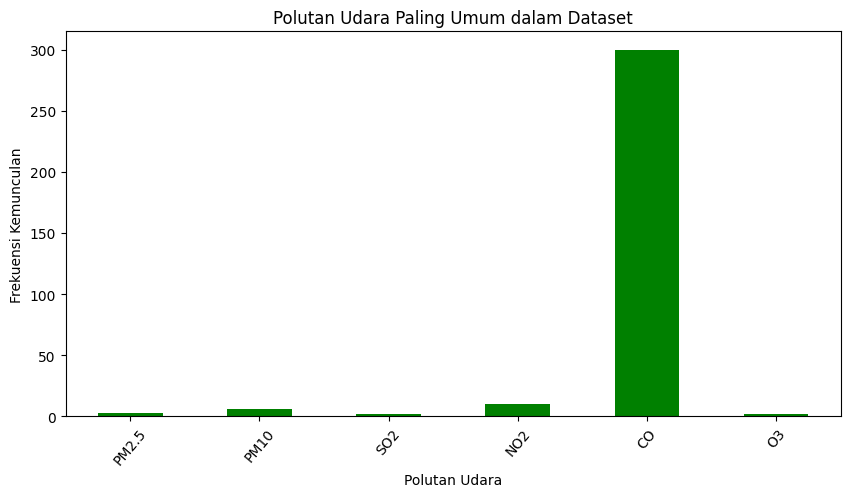

In [15]:
# Kolom-kolom yang mengandung data polutan udara
polusi = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Mencari frekuensi kemunculan masing-masing polutan
total_polusi = df[polusi].mode().iloc[0]

# Membuat diagram batang untuk polutan yang paling umum
plt.figure(figsize=(10, 5))
total_polusi.plot(kind='bar', color='green')
plt.title('Polutan Udara Paling Umum dalam Dataset')
plt.xlabel('Polutan Udara')
plt.ylabel('Frekuensi Kemunculan')
plt.xticks(rotation=50)
plt.show()

### Pertanyaan 2: Bagaimana kondisi udara selama waktu periode bulanan dan tahunan?

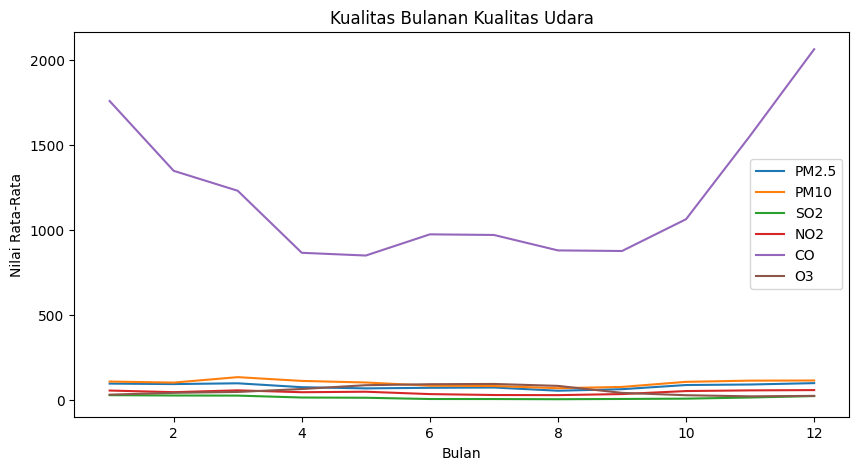

In [16]:
annual_data = df.groupby('month').agg({'PM2.5': 'mean', 'PM10': 'mean', 'SO2': 'mean', 'NO2': 'mean', 'CO': 'mean', 'O3': 'mean'})

plt.figure(figsize=(10, 5))
for column in annual_data.columns:
    plt.plot(annual_data.index, annual_data[column], label=column)

plt.title('Kualitas Bulanan Kualitas Udara')
plt.xlabel('Bulan')
plt.ylabel('Nilai Rata-Rata')
plt.legend()
plt.show()

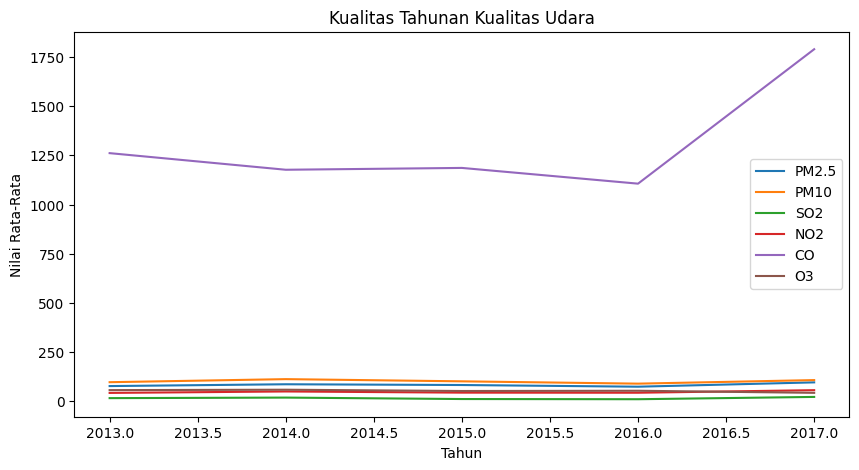

In [17]:
annual_data = df.groupby('year').agg({'PM2.5': 'mean', 'PM10': 'mean', 'SO2': 'mean', 'NO2': 'mean', 'CO': 'mean', 'O3': 'mean'})

plt.figure(figsize=(10, 5))
for column in annual_data.columns:
    plt.plot(annual_data.index, annual_data[column], label=column)

plt.title('Kualitas Tahunan Kualitas Udara')
plt.xlabel('Tahun')
plt.ylabel('Nilai Rata-Rata')
plt.legend()
plt.show()

## Conclusion

- Trend tingkat polusi udara di Shunyi terdiri dari PM2.5, PM10, SO2, NO2, CO, dan O3. Tingkat polutan udara yang paling umum di Shunyi adalah CO dibandingkan dengan tingkat udara lainnya.
- Kondisi udara selama waktu periode bulanan untuk tingkat polusi udara di Shunyi semuanya stabil, kecuali tingkat udara untuk CO yang memiliki peningkatan dan penurunan pada waktu periode bulanan. Kemudian, kondisi udara selama waktu periode tahunan untuk tingkat polusi udara di Shunyi memiliki peningkatan pada tahun 2016-2017.

STREAMLIT

In [18]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.5 MB/s eta 0:00:00


In [27]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
updated 1 package and audited 36 packages in 0.473s

3 packages are looking for funding
  run `npm fund` for details

found 2 moderate severity vulnerabilities
  run `npm audit fix` to fix them, or `npm audit` for details


In [28]:
import urllib
print("Password/Enpoint IP for localtunnel is:", urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

Password/Enpoint IP for localtunnel is: 35.231.1.196


In [29]:
!streamlit run /content/streamlit.py &>/content/logs.txt &

In [30]:
!npx localtunnel --port 8501

npx: installed 22 in 1.905s
your url is: https://whole-frogs-fold.loca.lt
^C
